# Module Assignment 4 Project for Course BAN6800 (Business Analytics Capstone)

Business Analytics Project - This project is about carrying out further analysis on the consolidated report dataset of Cognitive Software Solutions. We are expected to explore the data using standard approaches and techniques which involves step-by-step analysis of the essential variables of the dataset to gain knowledge into the report. The second part of the assignment involves developing a Customer Segmentation Model that will enable the company to be able to group their customers based on similar qualities or characteristics. The following process listed below will be carried out in this assignment

- **Task 0**: Exploratory Data Analysis (EDA) - This refers to process of understanding the relationships and correlations in the dataset and uncovering the hidden patterns and trends about the customers and their preferences.
- **Task 1**: Model Selection - This involves choosing the best and suitable algorithm for the segmentation with regards to the size of the dataset, the analytic problem and the type of data we have (label or unlabel).
- **Task 2**: Model Development - This refers to the process of building the segmentation model and training it using the dataset. After the model is fitted, it will be tested using an unseen data to determine its correcteness.
- **Task 3**: Model Evaluation and Update - Lastly the model will be evaluated for efficiency and correcteness using the several perfomance metrics. The score value of those metrics will determine if the model is well fitted to be deployed or if it requires optimization.

We will be building the Segementation model using a Hybrid aproach. We plan to select the Artificial Neural Network and the K-Means clustering techniques. ANNs (AutoEncodoers) was adopted because of its efficiency in handling large and complex dataset and will extract features based on compressed dimensions. Then, K-Means clustering technique will now be applied on the encoded data with the best number of k that will be determined using the Elbow method visualization.

### <u>1.0 Intro</u>
Here will begin the assignment by conducting an exploratory data analysis on the dataset to gain knowledge and intelligence into the customers behaviours and patterns.

In [724]:
# Import the neccessary libraries

import pandas as pd, warnings
from glob import glob
from sklearn.preprocessing import StandardScaler, LabelEncoder
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### <u>2.0 Load the Cleaned Dataset into the Python Environment from the previous work</u>

In [725]:
# Load the cleaned dataset into pandas dataframe.
dataset = pd.read_csv(filepath_or_buffer="cognitive_cleaned_dataset.csv")

### <u>3.0 Exploratory Data Analysis (EDA) Begins from here</u> ...

In [726]:
# Viewing the first 20 records of the company dataset
dataset.head(n=5)

,Customer_ID,Order_ID,Subscription_Date,Product_ID,Product_Name,Products_Category,Subscription_Type,Usage_Frequency,Revenue_Per_Customer,Payment_Plan,...,Feature_Adoption,Last_Login,Churn_Status,Customer_Tenure,Customer_Satisfaction,Marketing_Channel,Contract_Renewal,Num_Logins_Last_Month,Customer_Lifetime_Value,Engagement_Score
0,1,90968,11/01/2022,12,DeepMindX,Artificial Intelligence,Enterprise,Weekly,934.0,Monthly,...,76,19/04/2023,0,4,3,Social Media,1,4,3736.0,80
1,2,49801,11/01/2022,11,PredictEdge,Artificial Intelligence,Basic,Weekly,4379.0,Lifetime,...,87,26/06/2023,0,3,5,Social Media,0,20,13137.0,107
2,3,9772,11/01/2022,11,PredictEdge,Artificial Intelligence,Enterprise,Weekly,3735.0,Annual,...,58,14/05/2023,0,9,3,Social Media,0,16,33615.0,74
3,4,3238,11/01/2022,11,PredictEdge,Artificial Intelligence,Basic,Weekly,364.0,Monthly,...,60,10/04/2023,0,1,4,Referral,0,9,364.0,69
4,5,60599,11/01/2022,12,DeepMindX,Artificial Intelligence,Enterprise,Daily,4801.0,Annual,...,77,02/03/2024,0,7,2,Adverts,1,15,33607.0,92


In [727]:
# Viewing a summary statistics of the dataset for the numerical columns (mean, STD, IQR)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,99981.0,49991.000000,28862.172969,1.0,24996.0,49991.0,74986.0,99981.0
Order_ID,99981.0,50002.678029,28865.484511,1.0,25004.0,50003.0,75001.0,100000.0
Product_ID,99981.0,9.720857,6.232458,1.0,4.0,9.0,16.0,20.0
Revenue_Per_Customer,99981.0,2527.372275,1425.946256,50.0,1292.0,2525.0,3760.0,4999.0
Discount_Applied,99981.0,14.526880,8.665142,0.0,7.0,15.0,22.0,29.0
Support_Tickets,99981.0,24.471690,14.453047,0.0,12.0,24.0,37.0,49.0
Feature_Adoption,99981.0,59.447935,23.055843,20.0,39.0,59.0,79.0,99.0
Churn_Status,99981.0,0.150079,0.357150,0.0,0.0,0.0,0.0,1.0
Customer_Tenure,99981.0,4.998310,2.584698,1.0,3.0,5.0,7.0,9.0
Customer_Satisfaction,99981.0,3.005631,1.413194,1.0,2.0,3.0,4.0,5.0


Average and Mean of essential columns
- From the describe we can see the average Revenue_Per_Customer at 2527.372275 and STD of 1425.946256. 
- The avereage for Discount_Applied is 14.526880 and STD of 8.665142

In [728]:
# Now we want to check all the column names in dataset to know th relevant ones
print(dataset.shape)
dataset.columns

(99981, 22)


Index(['Customer_ID', 'Order_ID', 'Subscription_Date', 'Product_ID',
       'Product_Name', 'Products_Category', 'Subscription_Type',
       'Usage_Frequency', 'Revenue_Per_Customer', 'Payment_Plan',
       'Discount_Applied', 'Support_Tickets', 'Feature_Adoption', 'Last_Login',
       'Churn_Status', 'Customer_Tenure', 'Customer_Satisfaction',
       'Marketing_Channel', 'Contract_Renewal', 'Num_Logins_Last_Month',
       'Customer_Lifetime_Value', 'Engagement_Score'],
      dtype='object')

This is showing all the 22 column names in tha data. Including the two new features (Customer_Lifetime_Value and Engagement_Score) that was created from the last assignment.

### <u>3.1 Visualization of Essential Features to gain more understanding</u>

In [729]:
# Import the necessary packages for visualization 
import matplotlib.pylab as plt
import seaborn as sns

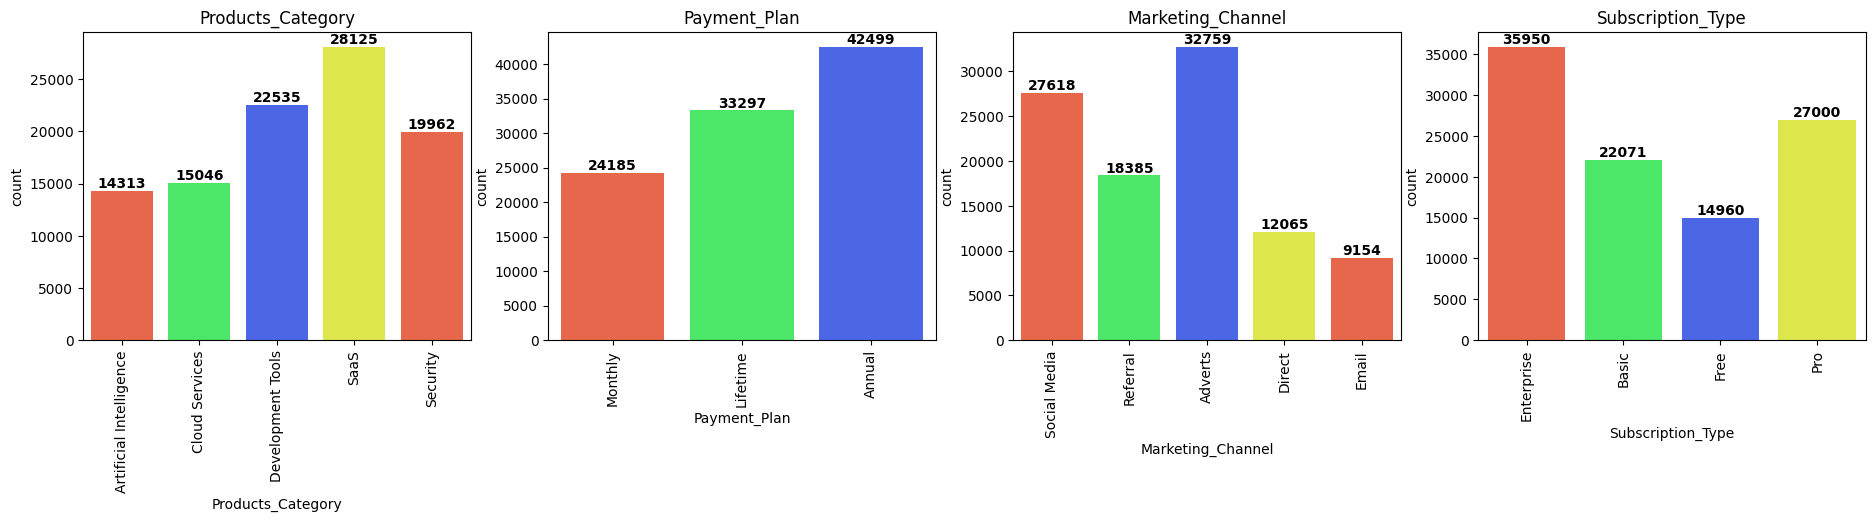

In [730]:
# Viewing the 5 products category of the Cognitive Software Solutions
dataset_columns = dataset[["Products_Category", "Payment_Plan", "Marketing_Channel", "Subscription_Type"]]

plt.figure(figsize=(23, 4))
colors = ["#FF5733", "#33FF57", "#3357FF", "#F3FF33"]
# sns.countplot(x=dataset[column], ax=axs, palette=colors)

for i, column in enumerate(dataset_columns.columns):
    axs = plt.subplot(1, len(dataset_columns.columns), i + 1)

    # Generate a color palette that matches the number of unique values
    num_unique = dataset[column].nunique()


    ax = sns.countplot(x=dataset[column], ax=axs, hue=dataset[column], palette=colors, legend=False)
    axs.set_title(f"{column}")

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, 
                p.get_height() + 0.1, 
                int(p.get_height()), 
                ha='center', va='bottom',
                fontsize=10, fontweight='bold', color='black')

 # Make data label display on a 90 degrees
    plt.xticks(rotation=90)
plt.show()


From the visuals above we can make the following conclusions based on distribution of the data.
- Product Category: We can see the the company's top three prodcuct category are SaaS, Development Tools and Security. Which means they should channel more resources to them more than the restnof the products.
- Payment Plan: We can see that many of the customers prefers doing payment on annual basis, while second prefrence are those that purchases the lifetime licence. The least of the prefrence is the monthly payment plan.
- Marketing Channel: Looking at the marketing strategies, we can see that most customers were gained through Adverts channel which is followed by the Social Media. Email channel appears to be the least and less resources should be less prioritized.
- Subscription Type: The graph shows that the Enterprise version of the company prodcucts are preferred by the customers due to its high performane and features. The least preferred version is the Free type which suggest that the version lacks essentail qualities.

### <u>3.2 Data Visualization -  Detailed breakdown of each Products Categories to gain more understanding</u>

We will attempt to do a more detailed breakdown of each of the product categories to understand the distribution and ascertain the best and least performing product.

In [731]:
# We do a filter of each of the categories and a one column dataframe
SaaS_category = dataset.query("Products_Category == 'SaaS'").filter(items=["Product_Name"])

Security_category = dataset.query("Products_Category == 'Security'").filter(items=["Product_Name"])

Cloud_Services_category = dataset.query("Products_Category == 'Cloud Services'").filter(items=["Product_Name"])

Artificial_Intelligence_category = dataset.query("Products_Category == 'Artificial Intelligence'").filter(items=["Product_Name"])

Development_Tool_category = dataset.query("Products_Category == 'Development Tools'").filter(items=["Product_Name"])

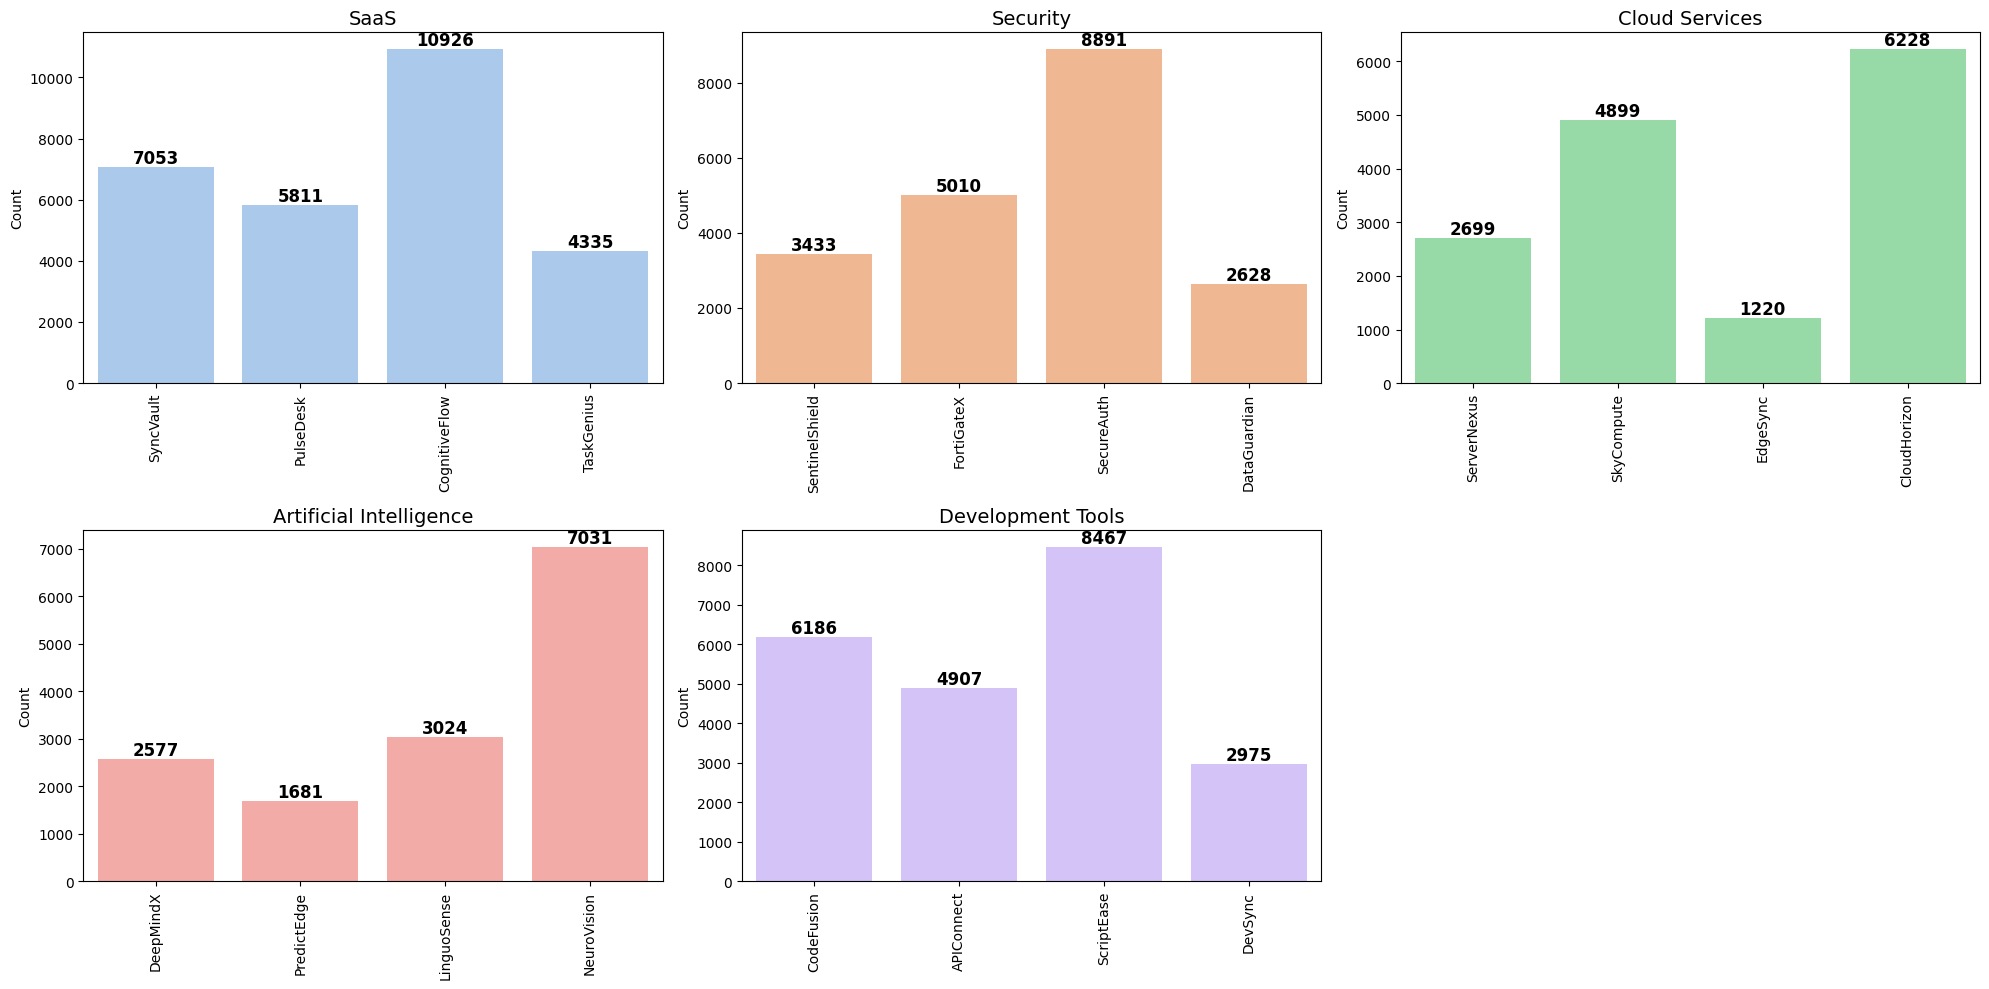

In [732]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categories and their filtered datasets
categories = {
    "SaaS": SaaS_category,
    "Security": Security_category,
    "Cloud Services": Cloud_Services_category,
    "Artificial Intelligence": Artificial_Intelligence_category,
    "Development Tools": Development_Tool_category
}

# Create a 2-row, 3-column subplot layout (for 5 plots, leaving one empty)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Set a color palette for better visualization
colors = sns.color_palette("pastel", len(categories))

# Flatten the 2D array of axes to easily iterate
axes = axes.flatten()

# Loop through each category and plot
for i, ((category_name, df), color) in enumerate(zip(categories.items(), colors)):
    ax = axes[i]
    plot = sns.countplot(x="Product_Name", data=df, ax=ax, color=color)

    # Add bold data labels on top of each bar
    for p in plot.patches:
        ax.text(p.get_x() + p.get_width() / 2,  
                p.get_height() + 0.1,  # Adjust position above the bar
                f'{int(p.get_height())}',  
                ha='center', fontsize=12, va='bottom', fontweight='bold', color='black')

    ax.set_title(category_name, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels for readability

# Remove the last empty subplot (since we only have 5 plots)
axes[-1].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


From the visuals above we can make the following conclusions based on distribution of the data.
- Saas Category: CognitiveFlow and SyncVault applications appears to be the most used software as a service within their category and should be prioritized since customers prefers them.
- Security: Under this category, SecureAuth is the most preferred maybe due to its feature and performance.
- Cloud Services: In this category of products, CloudHorizon and SkyCompute are the more preferred hosting sites.
- Artificial Intelligence: NeuroVision has more customer patronage than the rest of the products in this category.
- Development Tools: For this category, ScriptEase  and CodeFusion are the topping the charts and should be prioritized.

### <u>Conclusion on EDA</u>

From the two visual analysis above, we have been able to gain some insights from the data. These following insights has been gained.
- We have been able to determine which product category is the most thriving within the company.
- The best and most used Payment Plan was determined which us the Annual subcription.
- Data has revealved the best channels for products marketing that will create more awareness and increase customer base.
- Finally, we also discovered the subscription type customers prefers which might be due to enhanced features.

## <u>Data Modeling Begins Here</u> ...

The first phase is to select the appropriate algorithm. Considering the our business objectives which is to group customers based on similar qualities for more targeted marketing and we also have a large dataset, we choose a hybrid approach of using ANNs (Due to ability to handle complex and complex data) and K-Means (This is the traditional clustering technique)
- ANNs will be used for
- K-Means will be used for 

In [733]:
## Load the neccesary algorithms
import tensorflow as tf
from keras._tf_keras.keras.models import Sequential, Model
from keras import layers, optimizers, losses, metrics, utils

from sklearn.cluster import KMeans

In [734]:
# Data Transformation 1

# Define categorical columns
categorical_cols = ['Product_Name', 'Products_Category', 'Subscription_Type', 'Usage_Frequency', 'Payment_Plan', 'Marketing_Channel']

# Make a copy of the dataset to retain the original dataframe
dataset_transform =  dataset.copy()

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply encoding to each column separately
for col in categorical_cols:
    dataset_transform[col] = label_encoder.fit_transform(dataset_transform[col])

In [735]:
dataset.head(n=3)

,Customer_ID,Order_ID,Subscription_Date,Product_ID,Product_Name,Products_Category,Subscription_Type,Usage_Frequency,Revenue_Per_Customer,Payment_Plan,...,Feature_Adoption,Last_Login,Churn_Status,Customer_Tenure,Customer_Satisfaction,Marketing_Channel,Contract_Renewal,Num_Logins_Last_Month,Customer_Lifetime_Value,Engagement_Score
0,1,90968,11/01/2022,12,DeepMindX,Artificial Intelligence,Enterprise,Weekly,934.0,Monthly,...,76,19/04/2023,0,4,3,Social Media,1,4,3736.0,80
1,2,49801,11/01/2022,11,PredictEdge,Artificial Intelligence,Basic,Weekly,4379.0,Lifetime,...,87,26/06/2023,0,3,5,Social Media,0,20,13137.0,107
2,3,9772,11/01/2022,11,PredictEdge,Artificial Intelligence,Enterprise,Weekly,3735.0,Annual,...,58,14/05/2023,0,9,3,Social Media,0,16,33615.0,74


### Feature Selection for Data Modeling

Since our objective in this Business analytic project is to group customers based on similar qualities, we will select only categorical features from the dataset which the model will analyze and be able to map each customer to a particular cluster based on the similar attributes.

In [736]:
# Selecting the essential columns that contains qualitative data about each customer
dataset_categoricals = dataset_transform.filter(items=["Customer_ID", "Product_ID", "Products_Category", "Subscription_Type", "Usage_Frequency", "Payment_Plan", "Marketing_Channel"])

# Standardize the data
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset_categoricals)

In [737]:
# Validate the scaled dataset
print(scaled_dataset)

[[-1.73203348  0.3656911  -1.69927279 ...  1.21610878  1.48663783
   1.23704096]
 [-1.73199884  0.20523996 -1.69927279 ...  1.21610878  0.23015584
   1.23704096]
 [-1.73196419  0.20523996 -1.69927279 ...  1.21610878 -1.02632615
   1.23704096]
 ...
 [ 1.73196419 -0.43656461  1.32998192 ... -0.00655472 -1.02632615
   0.6305376 ]
 [ 1.73199884 -0.43656461  1.32998192 ...  1.21610878  0.23015584
   0.02403423]
 [ 1.73203348 -0.27611346  1.32998192 ... -0.00655472 -1.02632615
   1.23704096]]


### Building the Autoencoder Model Class with essential methods
This class is the blueprint of the Autoencoder Model. We implemented the Functional API approach to seperate the Encoder and Decoder methods for flexibility, modularity and better functionality of the model. Our purpose is to train the Autoencoder and use it to extract encoded features that will serve as input to the K-Means Model for better clustering.

In [738]:
# Encoder Model
def build_encoder(input_dim, encoding_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(units=64, activation='relu')(inputs)
    encoded = layers.Dense(units=encoding_dim, activation=tf.nn.relu, name="encoded_layer")(x)
    encoded = layers.Dropout(0.2)(encoded) # Regularization
    return Model(inputs, encoded, name="Encoder")

# Decoder Model
def build_decoder(encoding_dim, output_dim):
    inputs = layers.Input(shape=(encoding_dim,))
    x = layers.Dense(units=64, activation='relu')(inputs)
    decoded = layers.Dense(units=output_dim, name="decoded_layer")(x)
    return Model(inputs, decoded, name="Decoder")

# AutoEncoder Model
class AutoEncoder(Model):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = build_encoder(input_dim, encoding_dim)
        self.decoder = build_decoder(encoding_dim, input_dim)

    def call(self, X):
        Z = self.encoder(X)
        return self.decoder(Z)

    def encode(self, X):
        return self.encoder(X)

    def decode(self, Z):
        return self.decoder(Z)

### Initialize the Process of Building and Training the Autoencoder ... 

In [739]:
input_dim = scaled_dataset.shape[1]
encoding_dim = 8  # Compressing features to appropriate dimensions

# Initialize Autoencoder class
autoencoder = AutoEncoder(input_dim=input_dim, encoding_dim=encoding_dim)

# Compile Model
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss=losses.mean_squared_error, metrics=['accuracy'])

# Train the Model
history = autoencoder.fit(scaled_dataset, scaled_dataset, epochs=50, batch_size=256, shuffle=True,verbose=1)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1865 - loss: 0.8849
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4179 - loss: 0.3984
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6586 - loss: 0.0907
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7545 - loss: 0.0278
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7938 - loss: 0.0142
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8063 - loss: 0.0107
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8176 - loss: 0.0090
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8310 - loss: 0.0079
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - loss: 0.0072
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.0066
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8581 - loss: 0.0061
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

### Overview of the training process of the model over the 50 Epochs ...

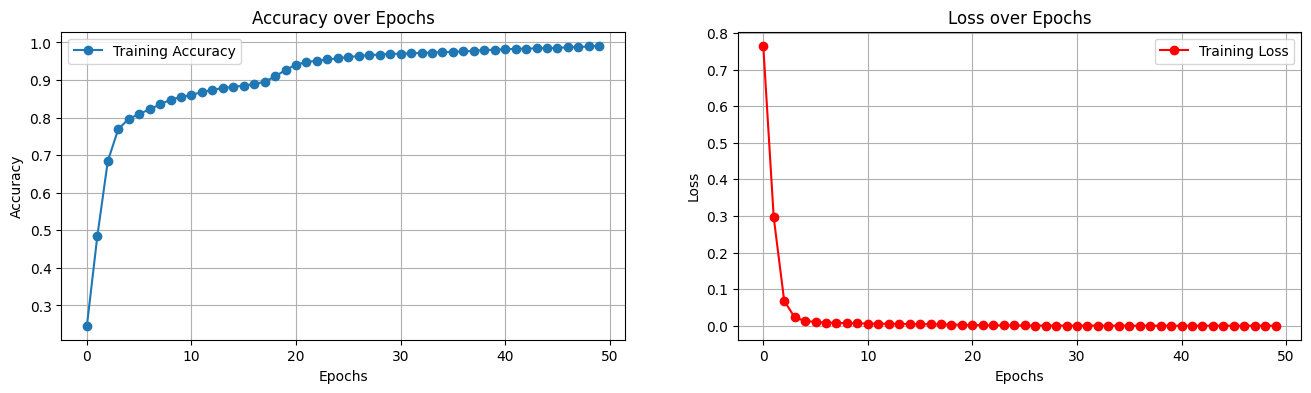

In [740]:

# Plot the graph of the Accuracy and Loss

plt.figure(figsize=(16, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

From the graph above, we can see the model training was very exccelent and maintained accruracy of over 95% from the 10th epochas to the 50th.

In [741]:
# Extract Encoder from Trained Autoencoder
encoder = autoencoder.encoder
encoded_features = encoder.predict(scaled_dataset)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 634us/step


### Building the K-Means Unsupervised Machine Learning...
From the extracted encoded features using the Autoencoder, we will now develop the K-Means Model for the segementation of the customers. This involves analyzing the provided encoded features and grouping them based on the best number of k identified from the Elbow Method Visualization. For us we will use the <u>KneeLocator Class</u> to auomate the evaluation of the WCSS and extract the best k which is mapped into the model development.

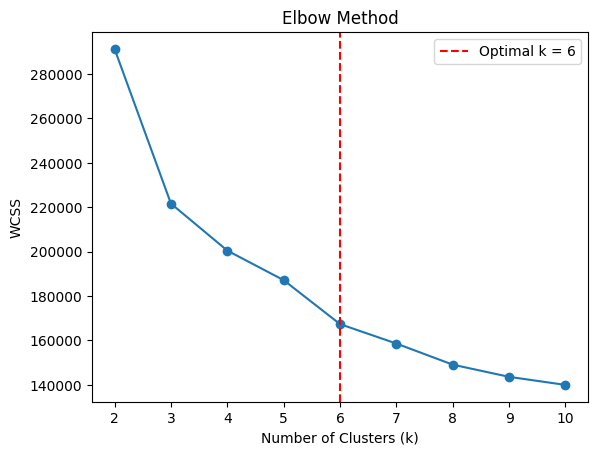

Optimal number of clusters: 6


In [742]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Compute WCSS values
wcss = []
k_range = range(2, 11)  # Try k values from 2 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_features)
    wcss.append(kmeans.inertia_)

# Find the "Elbow" point
knee = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
best_k = knee.knee

# Plot the Elbow Method
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Optimal k = {best_k}')
plt.legend()
plt.show()

print(f"Optimal number of clusters: {best_k}")


From the inspection of the Elbow method visualization we can see the optimal number for k can be functions between range of 4 and 6. This is where the elbow bends siginificantly to the right. This is also marked by the red vertical line.

In [743]:
# Fit K-Means with optimal k (This mapped automatically from the output of the KneeLocator)
optimal_k = best_k  # Best K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(encoded_features)

# Add Cluster Labels to the Original Data
dataset['Cluster'] = clusters
dataset.head()


,Customer_ID,Order_ID,Subscription_Date,Product_ID,Product_Name,Products_Category,Subscription_Type,Usage_Frequency,Revenue_Per_Customer,Payment_Plan,...,Last_Login,Churn_Status,Customer_Tenure,Customer_Satisfaction,Marketing_Channel,Contract_Renewal,Num_Logins_Last_Month,Customer_Lifetime_Value,Engagement_Score,Cluster
0,1,90968,11/01/2022,12,DeepMindX,Artificial Intelligence,Enterprise,Weekly,934.0,Monthly,...,19/04/2023,0,4,3,Social Media,1,4,3736.0,80,2
1,2,49801,11/01/2022,11,PredictEdge,Artificial Intelligence,Basic,Weekly,4379.0,Lifetime,...,26/06/2023,0,3,5,Social Media,0,20,13137.0,107,2
2,3,9772,11/01/2022,11,PredictEdge,Artificial Intelligence,Enterprise,Weekly,3735.0,Annual,...,14/05/2023,0,9,3,Social Media,0,16,33615.0,74,2
3,4,3238,11/01/2022,11,PredictEdge,Artificial Intelligence,Basic,Weekly,364.0,Monthly,...,10/04/2023,0,1,4,Referral,0,9,364.0,69,2
4,5,60599,11/01/2022,12,DeepMindX,Artificial Intelligence,Enterprise,Daily,4801.0,Annual,...,02/03/2024,0,7,2,Adverts,1,15,33607.0,92,2


### Model Evaluation Begins Here ...
We will evaluate the two models that was used in this project. The Autoencoder will be evaluated based on its efficiency on dimensionality reduction and feature extraction. we will use some error metrics to compare the orginal dataset and the reconstructed dataset.

The K-Means Model will be evaluated using the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index. These are the popular metrics used to measure the performance and how well the clusters are seperated.

In [744]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Get reconstructed data
reconstructed_data = autoencoder.predict(scaled_dataset)

# Compute errors
mse = mean_squared_error(scaled_dataset, reconstructed_data)
mae = mean_absolute_error(scaled_dataset, reconstructed_data)
explained_variance = explained_variance_score(scaled_dataset, reconstructed_data)

print(f"Reconstruction MSE: {mse:.4f}")
print(f"Reconstruction MAE: {mae:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step
Reconstruction MSE: 0.0000
Reconstruction MAE: 0.0023
Explained Variance Score: 1.0000


From the Metrics above, we draw the following conclusions for the Autoencoder:
- Reconstruction MSE: With the score of 0.000, the autoencoder perfectly reconstructed the input, indicating minimal loss.

- Reconstruction MAE: With the score of 0.0028, there is almost no absolute error, meaning the model captures the data structure well.

- Explained Variance Score: With the score of 1.000, the autoencoder fully retains the variance of the original data, meaning zero information loss.

In [745]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette = silhouette_score(encoded_features, clusters)
davies_bouldin = davies_bouldin_score(encoded_features, clusters)
calinski_harabasz = calinski_harabasz_score(encoded_features, clusters)

print(f"Silhouette Score: {silhouette:.4f} (Closer to 1 is better)")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")


Silhouette Score: 0.2277 (Closer to 1 is better)
Davies-Bouldin Index: 1.6106 (Lower is better)
Calinski-Harabasz Index: 32021.5997 (Higher is better)


From the Metrics above, we draw the following conclusions for the K-Means Cluster:
- Silhouette Score: The of 0.2457 is low, which means that there are some overlapping in the clusters as the optimal score should be 1. This is likely caused due to many features used as some customers shares similar qualities across. We will continue to optimize this by hyper-tuning and reduction of selected features.

- Davies-Bouldin Index: This is another metric and has this score of 1.6392 which should be very lower. It also shows that the clusters are not fully distinct as expected. More optimization is expected to further reduce this score value

- Calinski-Harabasz Index: With the high index score of 41626.5371, it shows the variance between the clusters are well defined. Based on how large the dataset is, the variance is expected to be much more

### Visual Representation of the clusters ...
We can take a peek on how thw clusters are seperated using the scatterplot.

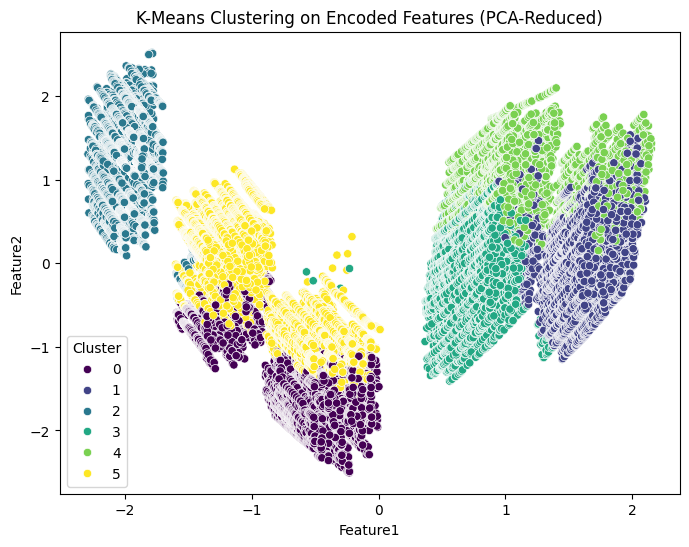

In [746]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
encoded_2D = pca.fit_transform(encoded_features)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_2D, columns=['Feature1', 'Feature2'])
encoded_df['Cluster'] = clusters 

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', palette='viridis', data=encoded_df)
plt.title("K-Means Clustering on Encoded Features (PCA-Reduced)")
plt.show()


In [ ]:
# Export the Dataset with the Clustured Feature
dataset.to_csv(path_or_buf="Cognitive_Clusterred_Dataset.csv", index=False)

## Conclusion on the Customer Segementation Project - Analysis, Modeling and Evaluation
We have succesfully carried out all the tasks expected in this phase which are:
- <u>Exploratory Data Analysis (EDA)</u> - We carried out an extensive analysis of the dataset collected from the subsidiaries of Cognitive Software Solutions. We were able to gain some understanding and insight on how different features (categorical qualities) were distributed and determined the best performing categories that should be prioritized for more marketing stratgies.


- <u>Model Development</u> - Due to how large the dataset is, we used the hybrid approach by combing two models for better segementation. We used the ANNs to build an Autoencoder model tha was used to reduction and features extraction that will serve as an input to the K-Means. While the K-Means is the traditional unsupervised machine learning that was now used to segment the customers based on the number of k that was gotten using the Elbow Method.


- <u>Model Evaluation</u> - After the development of the two models, we went further to evaluate the performance of the models using the appropriate metrics. From the different scores we can conclude that the Autoencoder is performing optimally with accuracy of 99% and was able to reconstruct the scaled datset with minimal errors. The metrics for the K-Means shows the model is perfroming well but will require more optimization to achieve a more distinct cluster without overlap.

With this, we have developed and trained a Customer Segmentation model and used its algorithm and functionality to group the customers using simialr qualities and characteristics. 